In [22]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "E1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [23]:
plano_df = pd.read_excel('timeline.xlsx', sheet_name='Plano')
meeting_df = pd.read_excel('timeline.xlsx', sheet_name='Meeting')
mstone_df = pd.read_excel('timeline.xlsx', sheet_name='MileStones')
a_df = pd.read_excel('timeline.xlsx', sheet_name='AtividadeA')
b_df = pd.read_excel('timeline.xlsx', sheet_name='AtividadeB')
c_df = pd.read_excel('timeline.xlsx', sheet_name='AtividadeC')
d_df = pd.read_excel('timeline.xlsx', sheet_name='AtividadeD')
combine = [plano_df, a_df, b_df, c_df, d_df]

## Analisar Os Dados da Primeira Entrega

In [24]:
for dataset in combine:
    print(dataset.columns.values)
    print('*' * 80)

['Tarefas' 'Papeis' 'Nomes' 'Horas' 'Data inicio' 'Data']
********************************************************************************
['Tarefas' 'Papeis' 'Nomes' 'Horas' 'Data inicio' 'Data']
********************************************************************************
['Tarefas' 'Papeis' 'Nomes' 'Horas' 'Data inicio' 'Data']
********************************************************************************
['Tarefas' 'Papeis' 'Nomes' 'Horas' 'Data inicio' 'Data']
********************************************************************************
['Tarefas' 'Papeis' 'Nomes' 'Horas' 'Data inicio' 'Data']
********************************************************************************


In [25]:
for dataset in combine:
    dataset['Tarefas'] = dataset['Tarefas'].str.strip()
    dataset['Nomes'] = dataset['Nomes'].str.strip()
    dataset['Papeis'] = dataset['Papeis'].str.strip()

In [26]:
plano_df.head()

,Tarefas,Papeis,Nomes,Horas,Data inicio,Data
0,Sumario excutivo,Documentalista,Andre Canelho,2.0,2022-02-25,2022-02-25
1,Distribuicao de tarefas,Gestor de Projeto,Dong,2.0,2022-02-24,2022-02-24
2,Distribuicao de tarefas,Gestor de Projeto,Maria Machado,2.0,2022-02-24,2022-02-24
3,Definicao do Ambito,Analista,Maria Machado,1.0,2022-03-01,2022-03-01
4,Definicao de Papeis,Gestor de Projeto,Dong,1.0,2022-02-24,2022-02-24


In [27]:
plano_df.groupby(['Nomes', 'Horas', 'Tarefas']).sum()

Papeis
Nomes         Horas Tarefas                                                     
Andre Canelho 1.0   Revisao de documentos                               Analista
              2.0   Entrega Interna                               Documentalista
                    Escolha de metodologias                        Metodologista
                    Reflexao do trabalho realizado                      Analista
                    Sumario excutivo                              Documentalista
              3.0   Elaboracao da Documentacao                    Documentalista
Dong          0.5   E1                                         Gestor de Projeto
              1.0   Definicao de Papeis                        Gestor de Projeto
                    Definicao de Pontos de controlo            Gestor de Projeto
                    Revisao de documentos                               Analista
              2.0   Distribuicao de tarefas                    Gestor de Projeto
                    Entrega Interna                               Documentalista
                    Estimativa de custos                                Analista
                    Reflexao do trabalho realizado                      Analista
              3.0   Elaboracao da Documentacao                    Documentalista
              8.0   Excel e analise                            Gestor de Projeto
Joao Pereira  1.0   Identificacao das restricoes do projeto             Analista
                    Identificacao de pressupostos                       Analista
                    Revisao de documentos                               Analista
              2.0   Elaboracao de atas                                  Analista
                    Entrega Interna                               Documentalista
                    Identificacao das necessidades do cliente           Analista
                    Reflexao do trabalho realizado                      Analista
              3.0   Elaboracao da Documentacao                    Documentalista
Joao Vieira   1.0   Revisao de documentos                               Analista
              2.0   Consideracoes sobre o Caso de negocio               Analista
                    Controlo de qualidade                          Metodologista
                    Entrega Interna                               Documentalista
                    Reflexao do trabalho realizado                      Analista
              3.0   Elaboracao da Documentacao                    Documentalista
                    WBS                                                 Analista
Maria Machado 1.0   Definicao de Papeis                        Gestor de Projeto
                    Definicao de Pontos de controlo            Gestor de Projeto
                    Definicao do Ambito                                 Analista
                    Revisao de documentos                               Analista
              2.0   Distribuicao de tarefas                    Gestor de Projeto
                    Entrega Interna                               Documentalista
                    Estimativa de custos                                Analista
                    Identificacao de riscos                             Analista
                    Reflexao do trabalho realizado                      Analista
              3.0   Elaboracao da Documentacao                    Documentalista
                    Elaboracao de atas                                  Analista
              4.0   Diagrama de Gantt                          Gestor de Projeto
Vitor Alves   1.0   Revisao de documentos                               Analista
              2.0   Entrega Interna                               Documentalista
                    Papeis e responsabilidades                    Documentalista
                    Realizacao da capa do trabalho                Documentalista
                    Reflexao do trabalho realizado                      Analista
              3.0   Elab

In [28]:
aux = plano_df.drop(labels=['Tarefas', 'Data inicio', 'Data'], axis=1)
NameByHours = aux.groupby(["Nomes"]).sum()

C:\Users\xuydo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Saving figure box_plot_hours


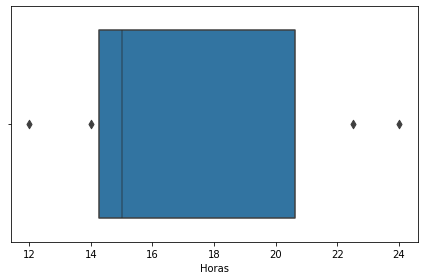

In [29]:
sns.boxenplot('Horas', data = NameByHours)
save_fig('box_plot_hours')
plt.show()


In [30]:
NameByHours

,Horas
Nomes,
Andre Canelho,12.0
Dong,22.5
Joao Pereira,14.0
Joao Vieira,15.0
Maria Machado,24.0
Vitor Alves,15.0


Saving figure Pie_chart_E1_Team


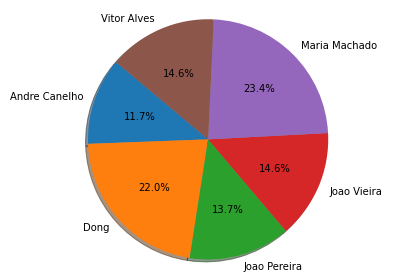

In [31]:
labels = NameByHours.index.values
sizes = NameByHours['Horas'].values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
save_fig('Pie_chart_E1_Team')
plt.show()

## Analisar as horas de trabalho por papeis da primeira Entrega

In [32]:
plano_df.head()

,Tarefas,Papeis,Nomes,Horas,Data inicio,Data
0,Sumario excutivo,Documentalista,Andre Canelho,2.0,2022-02-25,2022-02-25
1,Distribuicao de tarefas,Gestor de Projeto,Dong,2.0,2022-02-24,2022-02-24
2,Distribuicao de tarefas,Gestor de Projeto,Maria Machado,2.0,2022-02-24,2022-02-24
3,Definicao do Ambito,Analista,Maria Machado,1.0,2022-03-01,2022-03-01
4,Definicao de Papeis,Gestor de Projeto,Dong,1.0,2022-02-24,2022-02-24


In [33]:
aux = plano_df.drop(labels=['Tarefas', 'Nomes', 'Data inicio', 'Data'], axis=1)
ruleByHours = aux.groupby('Papeis').sum()

In [34]:
ruleByHours

,Horas
Papeis,
Analista,42.0
Documentalista,36.0
Gestor de Projeto,20.5
Metodologista,4.0


Saving figure Pie_chart_E1


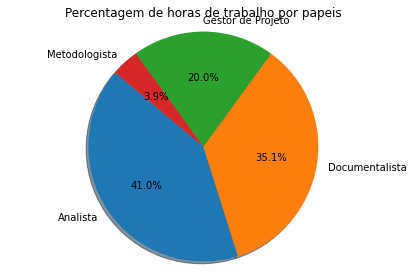

In [37]:
labels = ruleByHours.index.values
sizes = ruleByHours['Horas'].values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentagem de horas de trabalho por papeis')
save_fig('Pie_chart_E1')
plt.show()

In [36]:
aux = plano_df.drop(labels=['Tarefas', 'Data inicio', 'Data'], axis=1)
aux.groupby(['Nomes', 'Papeis']).sum()

Horas
Nomes         Papeis                  
Andre Canelho Analista             3.0
              Documentalista       7.0
              Metodologista        2.0
Dong          Analista             5.0
              Documentalista       5.0
              Gestor de Projeto   12.5
Joao Pereira  Analista             9.0
              Documentalista       5.0
Joao Vieira   Analista             8.0
              Documentalista       5.0
              Metodologista        2.0
Maria Machado Analista            11.0
              Documentalista       5.0
              Gestor de Projeto    8.0
Vitor Alves   Analista             6.0
              Documentalista       9.0

# Calcular os custos Total
1. O Papel de gestor de projeto tem um custo de 12 e restantes 10

### Obter os custos da primeira entrega

In [13]:
mstone_df

,MileStones,Data
0,E1,2022-03-05
1,E2,2022-03-26
2,A1,2022-03-24
3,E3,2022-04-30
4,A2,2022-05-26
5,E4,2022-05-21


In [14]:
E1 = mstone_df['Data'][0]
E2 = mstone_df['Data'][1]
E3 = mstone_df['Data'][3]
E4 = mstone_df['Data'][5]

In [15]:
def ObterOsDadosDaEntrega(X, E):
    aux = X['Data'].apply(lambda x: x <= E)
    return X.loc[aux]

In [16]:
def Custos(X): 
    aux = X['Papeis'].apply(lambda x: 12 if x=='Gestor de Projeto' else 10) * X.Horas
    return aux.sum()

In [17]:
def CustoMeeting(X):
    aux = X['Horas'] * 10
    return aux.sum()

In [18]:
# Todas as reunioes com o cliente
E1_meeting = ObterOsDadosDaEntrega(meeting_df, E1)
E2_meeting = ObterOsDadosDaEntrega(meeting_df, E2)
E3_meeting = ObterOsDadosDaEntrega(meeting_df, E3)
E4_meeting = ObterOsDadosDaEntrega(meeting_df, E4)

# Todas as entregas
E1_plano = ObterOsDadosDaEntrega(plano_df, E1)
E1_a = ObterOsDadosDaEntrega(a_df, E1)
E2_b = ObterOsDadosDaEntrega(b_df, E2)
E3_c = ObterOsDadosDaEntrega(c_df, E3)
E4_d = ObterOsDadosDaEntrega(d_df, E4)


In [19]:
#Obter custos
meeting_custo = + CustoMeeting(E2_meeting) + CustoMeeting(E3_meeting) + CustoMeeting(E4_meeting)
E1_Custo = Custos(E1_plano) + CustoMeeting(E1_meeting) + Custos(E1_a)
E2_Custo = Custos(E2_b) + CustoMeeting(E2_meeting)
E3_Custo = Custos(E3_c) + CustoMeeting(E3_meeting)
E4_Custo = Custos(E4_d) + CustoMeeting(E4_meeting)
Custo_total = E1_Custo + E2_Custo + E3_Custo + E4_Custo

In [20]:
print('Custo Entrega 1:', E1_Custo)
print('Custo Entrega 2:',E2_Custo)
print('Custo Entrega 3:' ,E3_Custo)
print('Custo Entrega 4:',E4_Custo)
print('Custo Total:',Custo_total)


Custo Entrega 1: 1846.0
Custo Entrega 2: 960
Custo Entrega 3: 1500
Custo Entrega 4: 3260
Custo Total: 7566.0
